In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.dates as mdates

In [2]:
script_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'Senior Design', 'scripts'))
if script_dir not in sys.path:
    sys.path.append(script_dir)
from raw_data import create_df, convert_to_dist, display_graph

In [3]:
raw_df = create_df("1.5meters")

Found file: ..\test_sheets\1.5meters_2025-03-02_14-56-28.csv


In [4]:
rssi_0 = -43.88 # vertical
#rssi_0 = -65.73 # horizontal

convert_to_dist(raw_df, rssi_0, 2)

In [5]:
raw_df["Distance"] = 10**((rssi_0 - raw_df["RSSI"])/(10*2))
raw_df["Distance"]

0       14.321879
1        0.508159
2        0.508159
3       16.069413
4        0.508159
          ...    
1322     0.639735
1323     0.639735
1324     0.957194
1325     0.903649
1326     0.853100
Name: Distance, Length: 1327, dtype: float64

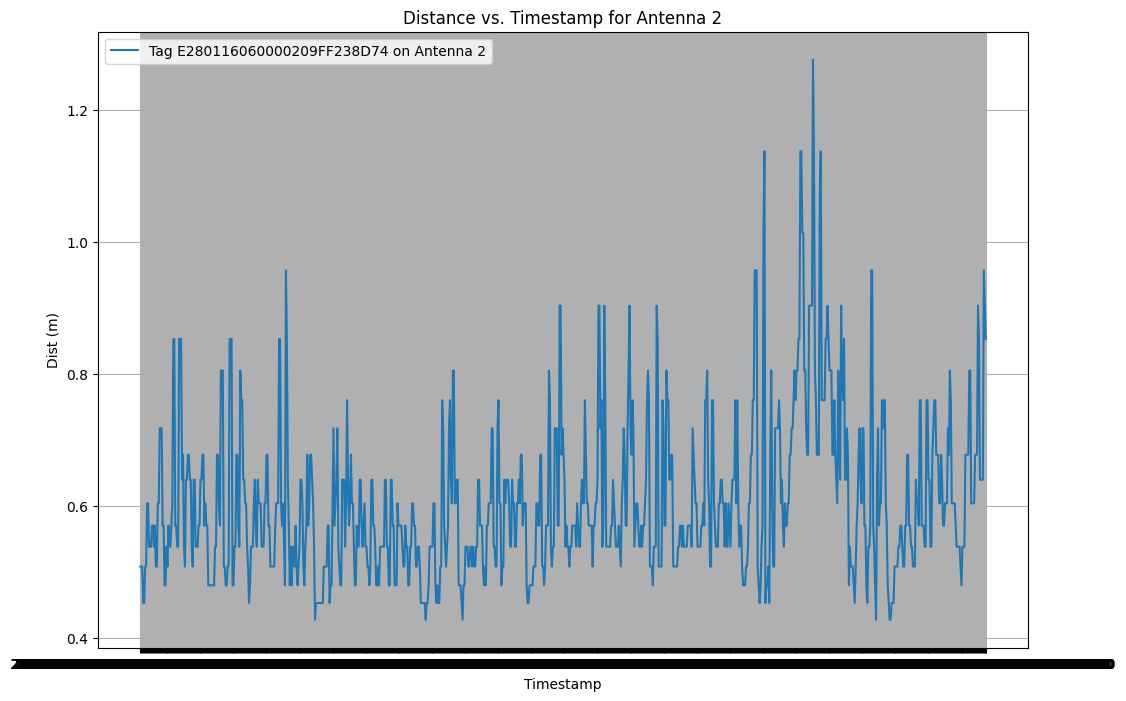

In [6]:
display_graph(raw_df, [2], ["E280116060000209FF238D74"])

In [7]:
raw_df.head()

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency,CRHandle,Distance
0,2025-03-02T14:58:30.4492260-07:00,303246279F8157800098AF2A,NaN,2,-67.0,911.75,speedwayr-12-05-fd.local,NaN,NaN,NaN,14.321879
1,2025-03-02T14:58:30.4509210-07:00,E280116060000209FF238D74,NaN,2,-38.0,911.75,speedwayr-12-05-fd.local,NaN,NaN,NaN,0.508159
2,2025-03-02T14:58:30.5204200-07:00,E280116060000209FF238D74,NaN,2,-38.0,911.75,speedwayr-12-05-fd.local,NaN,NaN,NaN,0.508159
3,2025-03-02T14:58:30.5225290-07:00,303246279F8157800098AF2A,NaN,2,-68.0,911.75,speedwayr-12-05-fd.local,NaN,NaN,NaN,16.069413
4,2025-03-02T14:58:30.6228870-07:00,E280116060000209FF238D74,NaN,2,-38.0,911.75,speedwayr-12-05-fd.local,NaN,NaN,NaN,0.508159


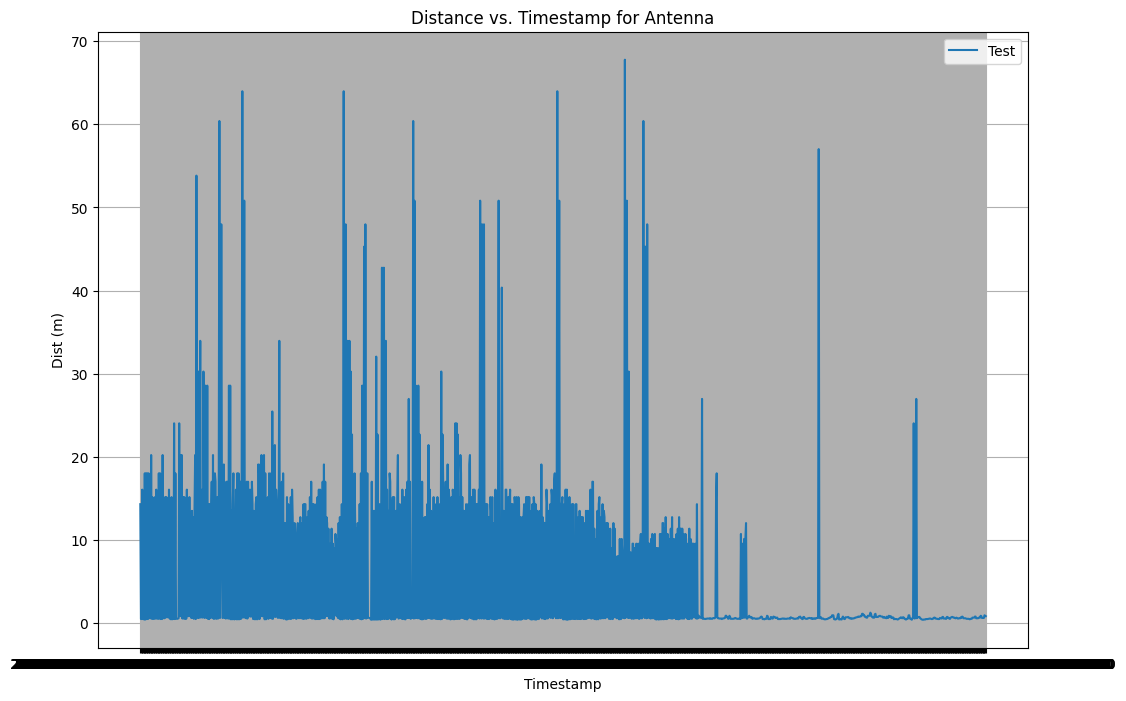

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(raw_df['Timestamp'], raw_df['Distance'], label=f'Test')
plt.xlabel('Timestamp')
plt.ylabel('Dist (m)')
plt.title(f'Distance vs. Timestamp for Antenna')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
Q1 = raw_df['Distance'].quantile(0.25)
Q3 = raw_df['Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = raw_df[(raw_df['Distance'] >= lower_bound) & (raw_df['Distance'] <= upper_bound)]

C:\Users\santi\AppData\Local\Temp\ipykernel_33992\178335859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Distance"] = filtered_df["Distance"].rolling(window=filter_window).mean()


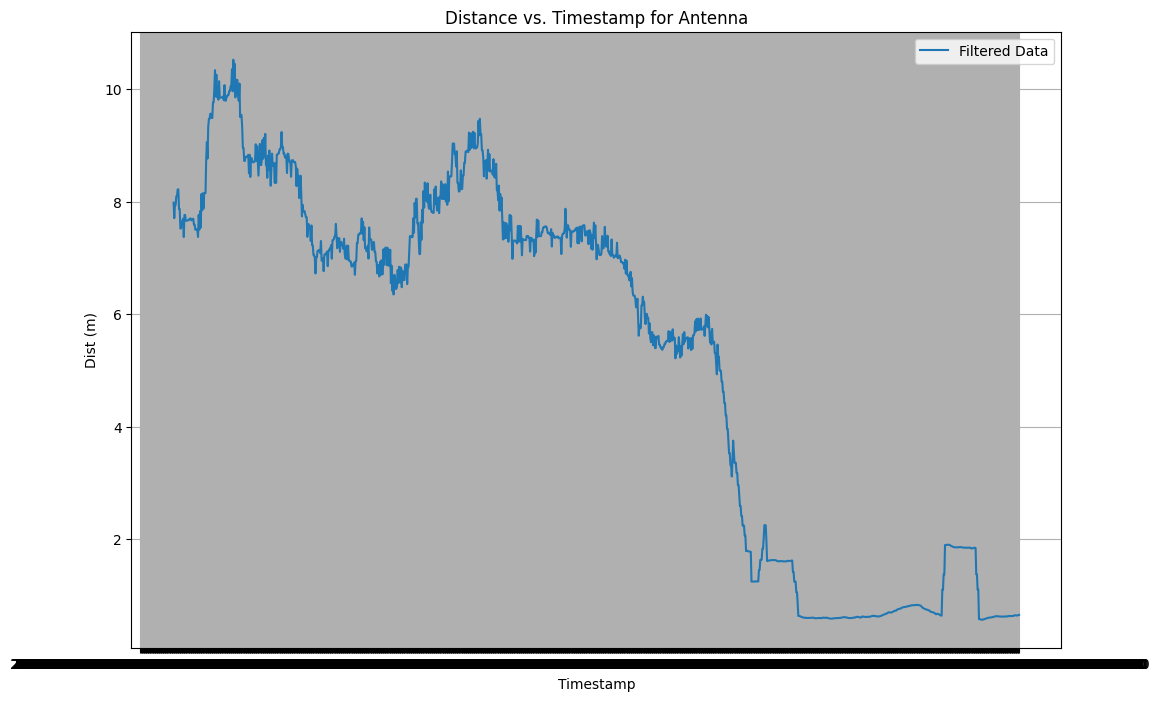

In [10]:
filter_window = 50
filtered_df["Distance"] = filtered_df["Distance"].rolling(window=filter_window).mean()

# Plot the filtered data
plt.figure(figsize=(12, 8))
plt.plot(filtered_df['Timestamp'], filtered_df['Distance'], label='Filtered Data')
plt.xlabel('Timestamp')
plt.ylabel('Dist (m)')
plt.title('Distance vs. Timestamp for Antenna')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_33992\3559492023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Norm_Distance"] = filtered_df["Distance"].rolling(window=filter_window).mean()


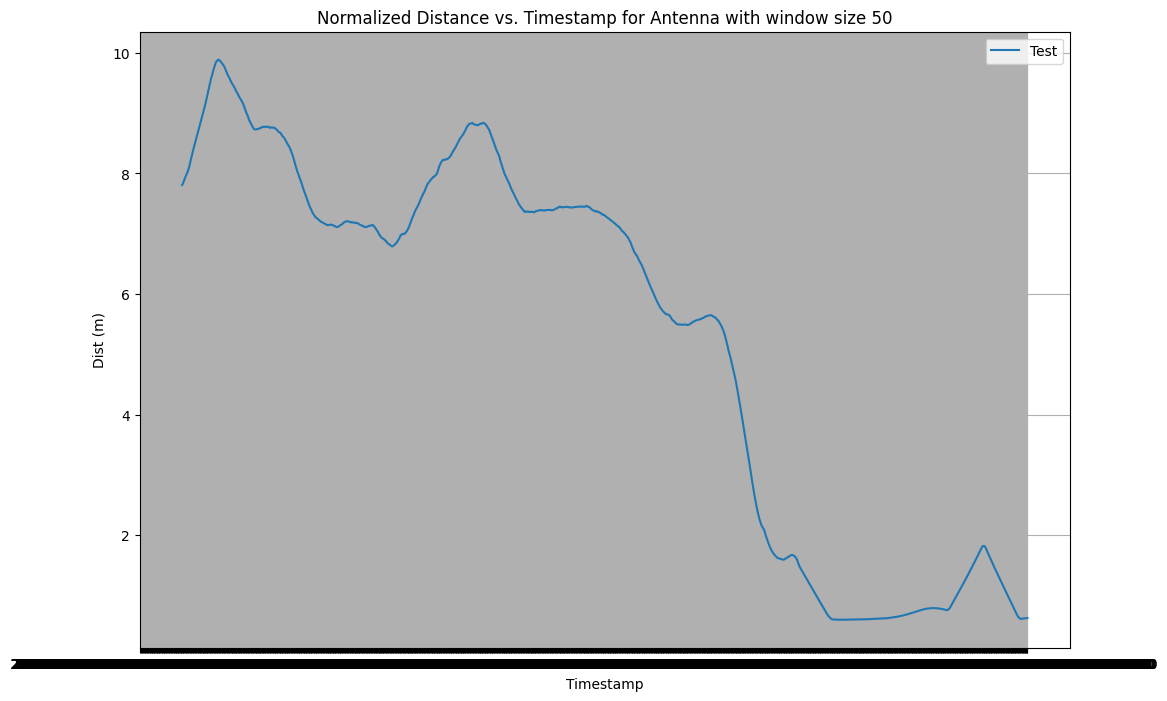

In [11]:
# moving average
filter_window = 50
filtered_df["Norm_Distance"] = filtered_df["Distance"].rolling(window=filter_window).mean()

plt.figure(figsize=(12, 8))
plt.plot(filtered_df['Timestamp'], filtered_df['Norm_Distance'], label=f'Test')
plt.xlabel('Timestamp')
plt.ylabel('Dist (m)')
plt.title(f'Normalized Distance vs. Timestamp for Antenna with window size {filter_window}')
plt.legend()
plt.grid(True)
plt.show()